In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
"""
Helper functions
"""
FLOAT_EMD_SEED567798408 = 0.995
QACT_EMD_SEED567798408 = 0.981
DENSE128_FLOAT_EMD_SEED1 = 0.883

def get_emd_files(experiment_dir):
    emd_files = []
    for d in os.listdir(experiment_dir):
        emd_file_found = False
        single_run_dir = os.path.join(experiment_dir, d)
        if os.path.isdir(single_run_dir):
            for f in os.listdir(single_run_dir):
                if "emd" in f:
                    emd_file_found = True
                    emd_files.append(os.path.join(experiment_dir, d, f))
                    break
        # if not emd_file_found:
        #     print(f"{os.path.join(experiment_dir, d)}")
    return emd_files

def get_seed_and_emds(emd_files):
    seed_and_emds = [] # list of (seed, emd)
    for file in emd_files:
        # Get EMD
        with open(file, "r") as f:
            emd = float(f.read())
        # Get seed
        txt_file = file.split("/")[-1]
        random_seed = int(re.findall(f'\d+', txt_file)[0])
        seed_and_emds.append((random_seed, emd))
    return seed_and_emds

def print_top_emd_and_seeds(experiment_dir):
    emd_files = get_emd_files(experiment_dir)
    seed_and_emds = get_seed_and_emds(emd_files)
    # Sort by EMD
    seed_and_emds.sort(key=lambda x : x[1]) 
    print(f"{len(seed_and_emds)} Runs")
    print("Top EMD + seeds")
    for s, e in seed_and_emds:
        print(f"{e:.3f}, {s}")

def emd_box_plot(experiment_dir, title="Random Seed Experiment", filename="random_seed_emd_boxplot"):
    emd_files = get_emd_files(experiment_dir)
    seed_and_emds = get_seed_and_emds(emd_files)
    emds = [emd for _, emd in seed_and_emds]

    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(y=emds, palette="pastel")

    ax.set_xlabel(f"{title} (n={len(emds)})")
    ax.set_ylabel("EMD")

    fig.tight_layout()
    plt.savefig(f"./plots/{filename}.pdf")
    plt.savefig(f"./plots/{filename}.png")

def emd_hist(experiment_dir, title="Random Seed Experiment", filename="random_seed_emd_hist"):
    emd_files = get_emd_files(experiment_dir)
    seed_and_emds = get_seed_and_emds(emd_files)
    emds = [emd for _, emd in seed_and_emds]

    fig, ax = plt.subplots(figsize=(4, 4))
    sns.histplot(x=emds, palette="pastel")

    ax.set_xlabel("EMD")
    ax.set_title(f"{title} n={len(emds)}")

    fig.tight_layout()
    plt.savefig(f"./plots/{filename}.pdf")
    plt.savefig(f"./plots/{filename}.png")

# Random Seed Test (EOL)

## Quantized weights + activations (float bias) (preloaded weights)

In [6]:
experiment_dir = "./brevitas_qall_preloaded_wts1/"
print_top_emd_and_seeds(experiment_dir)

9 Runs
Top EMD + seeds
0.989, 567798408
1.004, 1908781080
1.005, 1193976549
1.010, 126687014
1.016, 436657949
1.019, 1206943242
1.025, 1589076274
1.044, 630442169
1.045, 6849925


## Quantized weights + activations (float bias)

In [35]:
experiment_dir = "./brevitas_qall/"
print_top_emd_and_seeds(experiment_dir)

10 Runs
Top EMD + seeds
1.009, 436657949
1.019, 1193976549
1.025, 1908781080
1.047, 126687014
1.060, 1206943242
1.074, 322576610
1.089, 1589076274
1.100, 630442169
1.104, 567798408
1.192, 6849925


## Quantized Activations Only (Preloaded float weights)

In [7]:
experiment_dir = "./brevitas_qact_preloaded_wts/"
print_top_emd_and_seeds(experiment_dir)

10 Runs
Top EMD + seeds
0.981, 567798408
0.984, 322576610
0.986, 1908781080
0.994, 1193976549
1.002, 1589076274
1.015, 436657949
1.019, 630442169
1.020, 1206943242
1.024, 126687014
1.053, 6849925


In [5]:
experiment_dir = "./no_relu_quasi_sgdr_p6000/"
print_top_emd_and_seeds(experiment_dir)

10 Runs
Top EMD + seeds
0.988, 322576610
0.989, 1908781080
0.993, 567798408
0.996, 1193976549
1.003, 1589076274
1.010, 436657949
1.018, 630442169
1.018, 126687014
1.026, 1206943242
1.028, 6849925


## Quantized Activations Only

In [37]:
experiment_dir = "./brevitas_qact/"
print_top_emd_and_seeds(experiment_dir)

10 Runs
Top EMD + seeds
0.972, 1193976549
0.992, 1206943242
1.025, 567798408
1.038, 1908781080
1.046, 1589076274
1.090, 322576610
1.105, 630442169
1.114, 6849925
1.120, 126687014
1.275, 436657949


In [38]:
experiment_dir = "./no_relu_random_seed_exp/"
print_top_emd_and_seeds(experiment_dir)

24 Runs
Top EMD + seeds
0.995, 567798408
1.004, 1908781080
1.008, 322576610
1.014, 1589076274
1.024, 436657949
1.024, 1206943242
1.029, 126687014
1.030, 1193976549
1.031, 630442169
1.033, 6849925
1.034, 160483949
1.036, 1200125860
1.037, 913794644
1.042, 2078797010
1.050, 1417171588
1.053, 499893397
1.056, 27235967
1.060, 1236558542
1.060, 559390348
1.062, 1640514607
1.068, 638948466
1.079, 2064719489
1.081, 1822556975
1.094, 2008102734


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


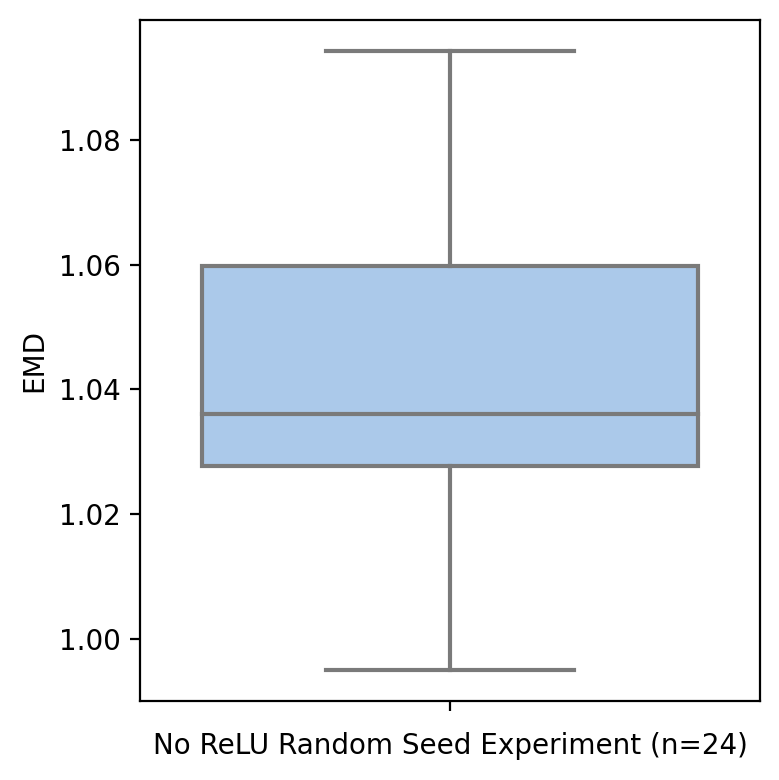

In [74]:
"""
EMD Box Plot
"""
experiment_dir = "./no_relu_random_seed_exp/"
emd_box_plot(
    experiment_dir, title="No ReLU Random Seed Experiment", filename="no_relu_random_seed_emds"
)

/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_2359040/2664757524.py:65: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=emds, palette="pastel")
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


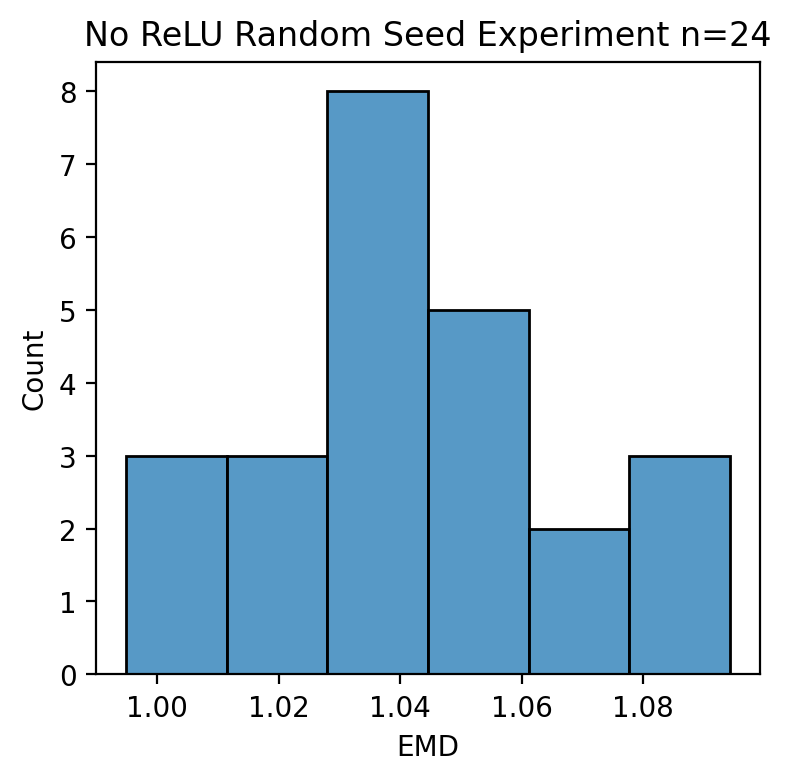

In [76]:
"""
EMD Histogram
"""
experiment_dir = "./no_relu_random_seed_exp/"
emd_hist(
    experiment_dir, title="No ReLU Random Seed Experiment", filename="no_relu_random_seed_emds_hist"
)

# Quantized Activations Grid Search
With preloaded trained float weights

QID X QR
[[1.08285588 1.03694938 1.04581181 1.04192308 1.05032757]
 [1.03046268 0.98866491 0.99186097 0.98284766 0.9842819 ]
 [1.03515073 1.00194357 0.98430409 0.98143964 0.97884121]
 [1.03167922 1.01309151 0.97962025 0.98406561 0.9808641 ]]
Min EMD: 0.9788412056428112
Max EMD: 1.0828558822904175


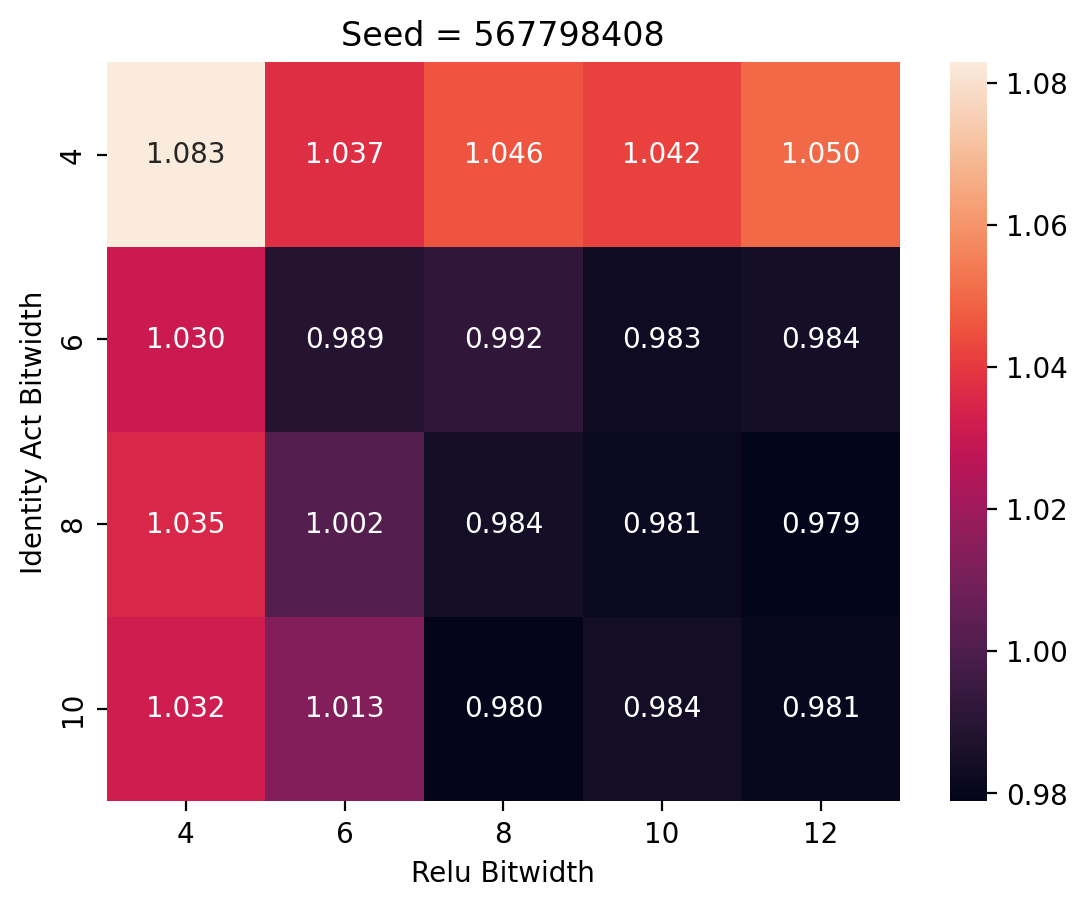

In [5]:
"""
Heatmap for quant activation grid search

EMD grid
     Quant ReLU
     4 6 8 10 12
4    x
6      y
8        z
10         a  b
QID
"""
experiment_dir = "./brevitas_qact_preloaded_wts_grid_search/"
emd_files = get_emd_files(experiment_dir)
emd_grid = np.zeros((4, 5))
relu_ticks = set()
id_ticks = set()
seed = 0
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    qrelu_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    qidentity_bitwidth = int(re.findall(f'\d+', txt_file)[2])
    relu_ticks.add(qrelu_bitwidth)
    id_ticks.add(qidentity_bitwidth)
    # Map bitwidth to grid coordinates
    qrelu_y_idx = (qrelu_bitwidth - 4) // 2
    qid_x_idx = (qidentity_bitwidth - 4) // 2
    emd_grid[qid_x_idx][qrelu_y_idx] = emd
    # print(f"({qidentity_bitwidth}, {qrelu_bitwidth}) -> ({qid_x_idx}, {qrelu_y_idx}) = {emd:.3f}")
print("QID X QR")
print(emd_grid)
min_emd = np.min(emd_grid)
max_emd = np.max(emd_grid)
print(f"Min EMD: {min_emd}")
print(f"Max EMD: {max_emd}")

sns.heatmap(emd_grid, vmin=min_emd, vmax=max_emd, annot=True, fmt=".3f")

relu_ticks = sorted(list(relu_ticks))
id_ticks = sorted(list(id_ticks))

plt.xticks(np.arange(len(relu_ticks)) + 0.5, relu_ticks)
plt.yticks(np.arange(len(id_ticks)) + 0.5, id_ticks)
plt.title(f"Seed = {seed}")

plt.xlabel("Relu Bitwidth")
plt.ylabel("Identity Act Bitwidth")

plt.savefig("./plots/qact_gridsearch_heatmap.png")


## Quant Activation (2-6 bits) + BN Grid Search

QID X QR
[[1.50699178 1.46164805 1.39235814 1.36944596 1.37738039]
 [1.31722953 1.20737539 1.16658166 1.1247122  1.16026491]
 [1.22658187 1.10837773 1.05622228 1.04326624 1.04593605]
 [1.19788448 1.06792895 1.03633816 1.01313321 1.03373628]
 [1.13687471 1.06158501 1.01225092 1.01369306 1.0143064 ]]
Min EMD: 1.012250921858389
Max EMD: 1.5069917793230274


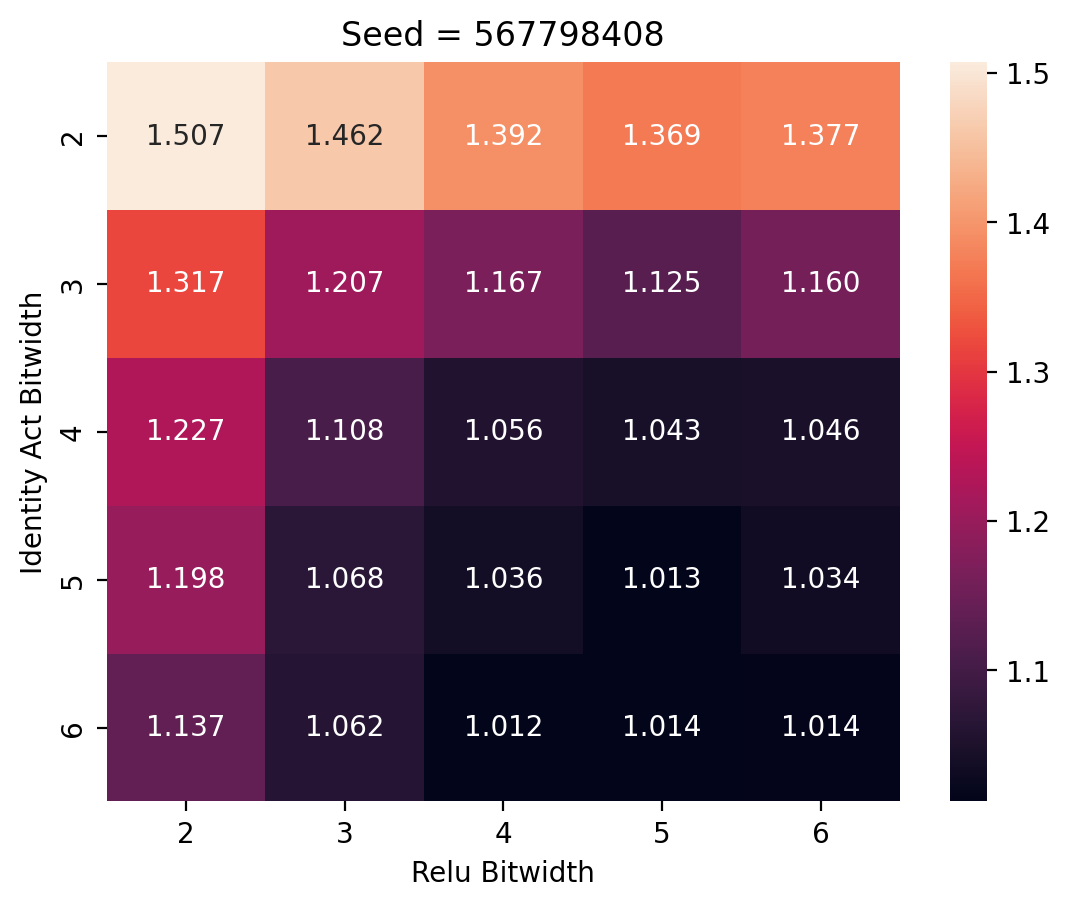

In [8]:
"""
Heatmap for quant activation (2-6 bits) + BN grid search

EMD grid
     Quant ReLU
     2 3 4 5 6
2    x
3      y
4        z
5          a
6            b
QID
"""
experiment_dir = "./brevitas_qact_bn_grid_search/"
emd_files = get_emd_files(experiment_dir)
emd_grid = np.zeros((5, 5))
relu_ticks = set()
id_ticks = set()
seed = 0
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    qrelu_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    qidentity_bitwidth = int(re.findall(f'\d+', txt_file)[2])
    relu_ticks.add(qrelu_bitwidth)
    id_ticks.add(qidentity_bitwidth)
    # Map bitwidth to grid coordinates
    qrelu_y_idx = qrelu_bitwidth - 2
    qid_x_idx = qidentity_bitwidth - 2
    emd_grid[qid_x_idx][qrelu_y_idx] = emd
    # print(f"({qidentity_bitwidth}, {qrelu_bitwidth}) -> ({qid_x_idx}, {qrelu_y_idx}) = {emd:.3f}")
print("QID X QR")
print(emd_grid)
min_emd = np.min(emd_grid)
max_emd = np.max(emd_grid)
print(f"Min EMD: {min_emd}")
print(f"Max EMD: {max_emd}")


sns.heatmap(emd_grid, vmin=min_emd, vmax=max_emd, annot=True, fmt=".3f")

relu_ticks = sorted(list(relu_ticks))
id_ticks = sorted(list(id_ticks))

plt.xticks(np.arange(len(relu_ticks)) + 0.5, relu_ticks)
plt.yticks(np.arange(len(id_ticks)) + 0.5, id_ticks)
plt.title(f"Seed = {seed}")

plt.xlabel("Relu Bitwidth")
plt.ylabel("Identity Act Bitwidth")

plt.savefig("./plots/qactbn_gridsearch_heatmap.png")


## Quantized Inputs + Activations w/BN + weight decay + cosine annealing warm restarts

QID X QR
[[0.         0.         0.        ]
 [0.         1.42876424 1.42019695]
 [1.49085624 1.34407481 1.35563668]]
Min EMD: 0.0
Max EMD: 1.490856238652555


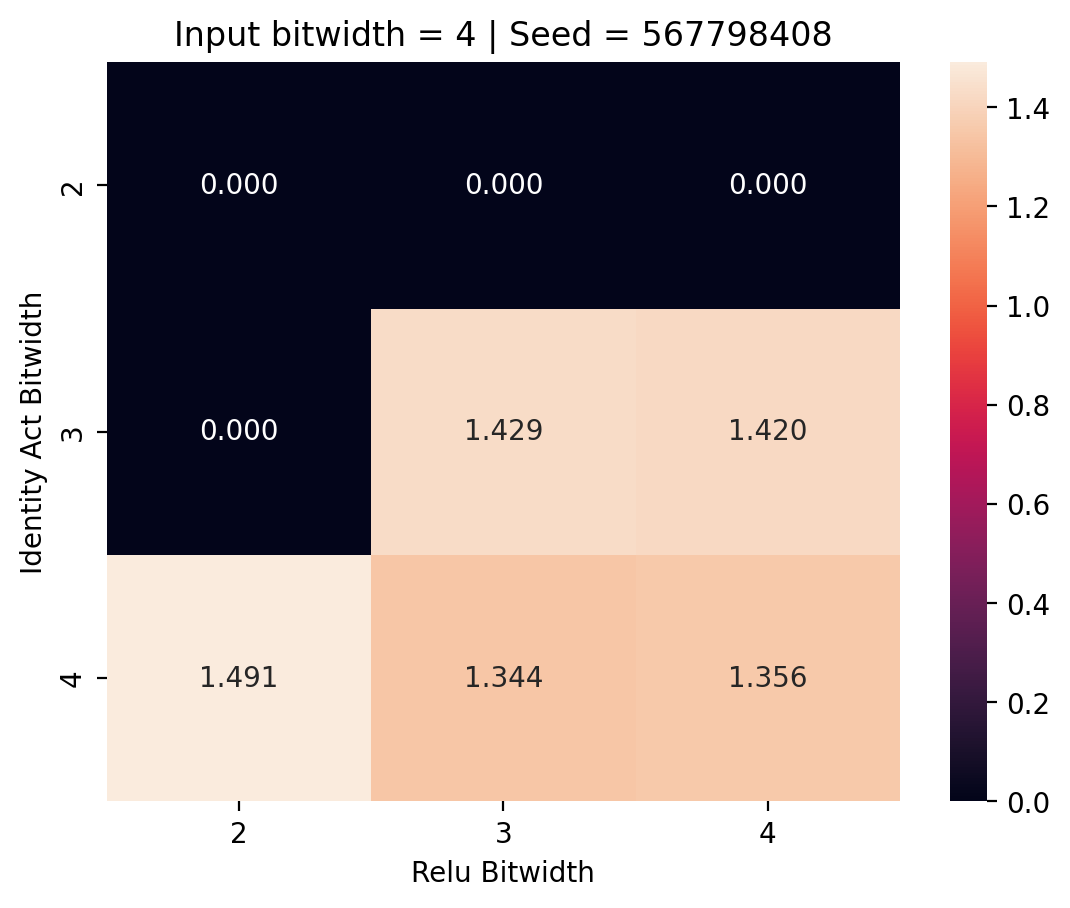

In [29]:
"""
Heatmap for quant activation (2-6 bits) + BN grid search

EMD grid
     Quant 
     ReLU
     2 3 4
2    x
3      y
4        z
QID
"""
experiment_dir = "./brevitas_quant_wd_cos_restarts_1000epochs/"
QINPUT_BITWIDTH = 4

emd_files = get_emd_files(experiment_dir)
emd_grid = np.zeros((3, 3))
relu_ticks = set()
id_ticks = set()
seed = 0
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    qinput_bitwidth = int(re.findall(f'\d+', txt_file)[3])
    if qinput_bitwidth == QINPUT_BITWIDTH:
        seed = int(re.findall(f'\d+', txt_file)[0])
        qrelu_bitwidth = int(re.findall(f'\d+', txt_file)[1])
        qidentity_bitwidth = int(re.findall(f'\d+', txt_file)[2])
        relu_ticks.add(qrelu_bitwidth)
        id_ticks.add(qidentity_bitwidth)
        # Map bitwidth to grid coordinates
        qrelu_y_idx = qrelu_bitwidth - 2
        qid_x_idx = qidentity_bitwidth - 2
        emd_grid[qid_x_idx][qrelu_y_idx] = emd
    # print(f"({qidentity_bitwidth}, {qrelu_bitwidth}) -> ({qid_x_idx}, {qrelu_y_idx}) = {emd:.3f}")
print("QID X QR")
print(emd_grid)
min_emd = np.min(emd_grid)
max_emd = np.max(emd_grid)
print(f"Min EMD: {min_emd}")
print(f"Max EMD: {max_emd}")


sns.heatmap(emd_grid, vmin=min_emd, vmax=max_emd, annot=True, fmt=".3f")

relu_ticks = sorted(list(relu_ticks))
if len(id_ticks) < 3: 
    id_ticks.add(2) # To manage select 1000 epoch experiments
id_ticks = sorted(list(id_ticks))

plt.xticks(np.arange(len(relu_ticks)) + 0.5, relu_ticks)
plt.yticks(np.arange(len(id_ticks)) + 0.5, id_ticks)
plt.title(f"Input bitwidth = {QINPUT_BITWIDTH} | Seed = {seed}")

plt.xlabel("Relu Bitwidth")
plt.ylabel("Identity Act Bitwidth")

plt.savefig(f"./plots/quant_wd_cos_restarts_qinput{QINPUT_BITWIDTH}_1000epochs_heatmap.png")


## Quantized Hyperparameter Search
6-bit inputs + 2-bit relu + 4-bit id + BN + weight decay + cosine annealing warm restarts

Varying LR, warm restarts schedule, WD, and batch size

In [30]:
experiment_dir = "./quant567798408_qr2_qi4_qinp6_hp_search/"
QINPUT_BITWIDTH = 6
QRELU_BITWIDTH = 2
QID_BITWIDTH = 4
SEED = 567798408 

emd_files = get_emd_files(experiment_dir)
lr = 0
wd = 0
lr_t0 = 0
batch_size = 0
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, lr, lr_t0, wd, batch_size\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    lr = float(re.findall(f'\d+\.\d+', txt_file)[0])
    wd = float(re.findall(f'\d+\.\d+', txt_file)[1])
    lr_t0 =  int(re.findall(f'\d+', txt_file)[4]) # int(re.findall(f'\d+', re.findall(f't0\d+', txt_file)[0])[0])
    batch_size =  int(re.findall(f'\d+', txt_file)[5])
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {lr:.3f}, {lr_t0}, {wd:.3f}, {batch_size}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

      emd     lr   lr_t0     wd   batch_size
0   1.116  0.010      50  0.010         1024
1   1.122  0.010     125  0.010          512
2   1.123  0.005     100  0.010          512
3   1.125  0.010     100  0.010         1024
4   1.168  0.010      50  0.001         1024
5   1.171  0.005     100  0.010         1024
6   1.178  0.005      50  0.010         1024
7   1.180  0.010     125  0.100          512
8   1.180  0.010     125  0.100         1024
9   1.190  0.010     100  0.100         1024
10  1.192  0.005      50  0.010          512
11  1.209  0.010     100  0.010          512
12  1.209  0.010     100  0.100          512
13  1.212  0.010      50  0.010          512
14  1.221  0.005      50  0.001         1024
15  1.227  0.010     100  0.001          512
16  1.229  0.010     125  0.010         1024
17  1.235  0.005      50  0.001          512
18  1.237  0.010     100  0.010         2048
19  1.237  0.010      50  0.001          512
20  1.238  0.010     100  0.001         1024
21  1.243 

6-bit inputs + 3-bit relu + 4-bit id + BN + weight decay + cosine annealing warm restarts

Varying warm restarts schedule, WD, and batch size

In [84]:
experiment_dir = "./quant567798408_qr3_qi4_qinp6_hp_search/"
QINPUT_BITWIDTH = 6
QRELU_BITWIDTH = 3
QID_BITWIDTH = 4
SEED = 567798408 

emd_files = get_emd_files(experiment_dir)
lr = 0
wd = 0
lr_t0 = 0
batch_size = 0
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, lr, lr_t0, wd, batch_size\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    lr = float(re.findall(f'\d+\.\d+', txt_file)[0])
    wd = float(re.findall(f'\d+\.\d+', txt_file)[1])
    lr_t0 =  int(re.findall(f'\d+', txt_file)[4]) # int(re.findall(f'\d+', re.findall(f't0\d+', txt_file)[0])[0])
    batch_size =  int(re.findall(f'\d+', txt_file)[5])
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {lr:.3f}, {lr_t0}, {wd:.3f}, {batch_size}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

     emd    lr   lr_t0     wd   batch_size
0  1.020  0.01      50  0.010          512
1  1.059  0.01     100  0.010          512
2  1.100  0.01     100  0.001          512
3  1.102  0.01     100  0.010         1024
4  1.108  0.01     100  0.001         1024


# Quantized Inputs (Float everything else)

[(4, 1.3237791136175658), (5, 1.1855524506014357), (6, 1.0886766487918107), (7, 1.0258335416067976), (8, 1.0064172499229063), (9, 1.019049550193396), (10, 1.0374648222046956), (11, 1.043470187509355)]


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py

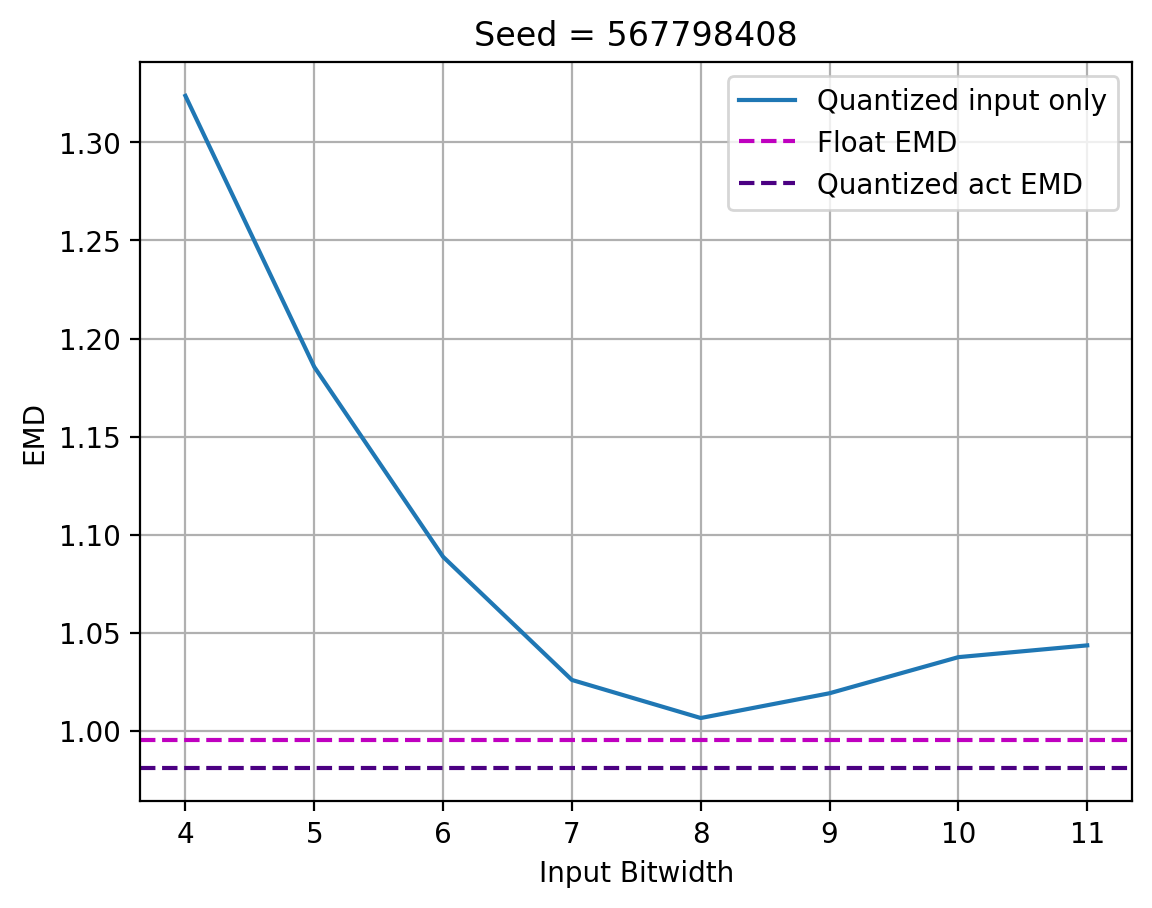

In [36]:
experiment_dir = "./brevitas_qinput_float_model"
emd_files = get_emd_files(experiment_dir)
relu_ticks = set()
id_ticks = set()
seed = 0
bitwidth_and_emds = []
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    input_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    bitwidth_and_emds.append((input_bitwidth, emd))
# Sort by bitwidth
bitwidth_and_emds.sort(key=lambda x : x[0]) 
print(bitwidth_and_emds)
bitwidths = [b for b, _ in bitwidth_and_emds]
emds = [e for _, e in bitwidth_and_emds]

ax = sns.lineplot(x=bitwidths, y=emds, linewidth=1.5, label="Quantized input only")
ax.axhline(y=FLOAT_EMD_SEED567798408, ls="--", color="m", label="Float EMD")
ax.axhline(y=QACT_EMD_SEED567798408, ls="--", color="indigo", label="Quantized act EMD")

plt.title(f"Seed = {seed}")

plt.xlabel("Input Bitwidth")
plt.ylabel("EMD")
plt.legend()
plt.grid()

plt.savefig("./plots/qinput_lineplot.pdf")

## Dense-only Autoencoder (Float) Hyperparameter Search

Varying number of dense features, learning rate, and batch size

In [19]:
experiment_dir = "./mlp_float/"
SEED = 1 

emd_files = get_emd_files(experiment_dir)
lr = 0
batch_size = 0
num_dense_feat = 0
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, lr, batch_size, num_dense_feat\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    lr = re.findall(f'\d+\.\d+', txt_file)
    if lr:
        lr = float(lr[0])
    else:
        lr = 0.1 
    nums = re.findall(f'\d+', txt_file)
    num_dense_feat = nums[1]
    if len(nums) > 2:
        batch_size = nums[4]
    else:
        batch_size = 512
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {lr:.3f}, {batch_size}, {num_dense_feat}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

     emd     lr   batch_size   num_dense_feat
0  1.460  0.001          512               32
1  1.626  0.001          512               16
2  1.657  0.001         1024               16
3  1.659  0.005          512               16
4  1.821  0.001          512               64
5  3.344  0.100          512               64
6  3.404  0.100          512               16
7  3.867  0.100          512               32


Adding BN and Varying WD, LR, Cosine Annealing w/Warm Restarts schedule, and number of dense featuers as hyperparameters

In [50]:
experiment_dir = "./mlp_float_bn_wd_cos_restarts/"
SEED = 1

emd_files = get_emd_files(experiment_dir)
lr = 0
wd = 0
lr_t0 = 0
batch_size = 0
num_dense_feat = 0
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, lr, lr_t0, wd, batch_size, num_dense_feat\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    lr = float(re.findall(f'\d+\.\d+', txt_file)[0])
    wd = float(re.findall(f'\d+\.\d+', txt_file)[1])
    lr_t0 =  int(re.findall(f'\d+', txt_file)[6]) 
    batch_size =  int(re.findall(f'\d+', txt_file)[-1])
    nums = re.findall(f'\d+', txt_file)
    num_dense_feat = nums[1]
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {lr:.4f}, {lr_t0}, {wd:.3f}, {batch_size}, {num_dense_feat}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

      emd      lr   lr_t0    wd   batch_size   num_dense_feat
0   0.883  0.0010      50  0.01          512              128
1   0.891  0.0005      50  0.01          512              128
2   0.935  0.0005      50  0.10          512              128
3   0.950  0.0010      50  0.10          512              128
4   1.068  0.0005      50  0.10          512               64
5   1.124  0.0010      50  0.10          512               64
6   1.172  0.0010      50  0.01          512               64
7   1.184  0.0010      50  0.01          512               32
8   1.184  0.0005      50  0.01          512               32
9   1.214  0.0005      50  0.01          512               64
10  1.245  0.0010      50  0.10          512               32
11  1.267  0.0005      50  0.10          512               32


## Dense-only random seed experiment

With 32 dense features, lr = 0.001, batch size = 512, and no last relu activation

In [37]:
experiment_dir = "./mlp_random_seed_exp/"

emd_files = get_emd_files(experiment_dir)
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, seed\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {seed}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

      emd        seed
0   1.222   317331638
1   1.238           1
2   1.253   818608693
3   1.264  1640514607
4   1.273  2008102734
5   1.273  1908781080
6   1.273  1206943242
7   1.275  2064719489
8   1.284   559390348
9   1.287   567798408
10  1.296  1126046607
11  1.303  1822556975
12  1.319  2099977519
13  1.323   126687014
14  1.338   638948466
15  1.346  1417171588
16  1.350  2078797010
17  1.355  1207866501
18  1.376  1994079540
19  1.400   499893397
20  1.409  1193976549
21  1.413   436657949
22  1.452  1589076274
23  1.467     6849925
24  1.469  1200125860
25  1.533   679775819
26  1.557  1682150025
27  1.569   434214399
28  1.574   160483949
29  1.606   630442169
30  1.740   828702192


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


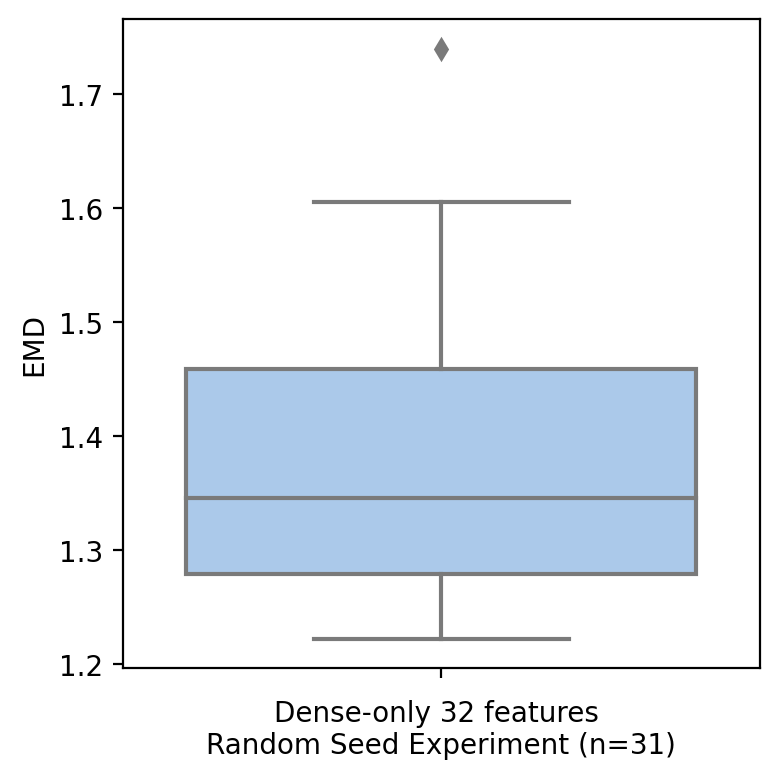

In [78]:
"""
EMD Box Plot
"""
experiment_dir = "./mlp_random_seed_exp/"
emd_box_plot(
    experiment_dir, 
    title="Dense-only 32 features \nRandom Seed Experiment", 
    filename="mlp_random_seed_emds"
)

/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_2359040/2664757524.py:65: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=emds, palette="pastel")
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


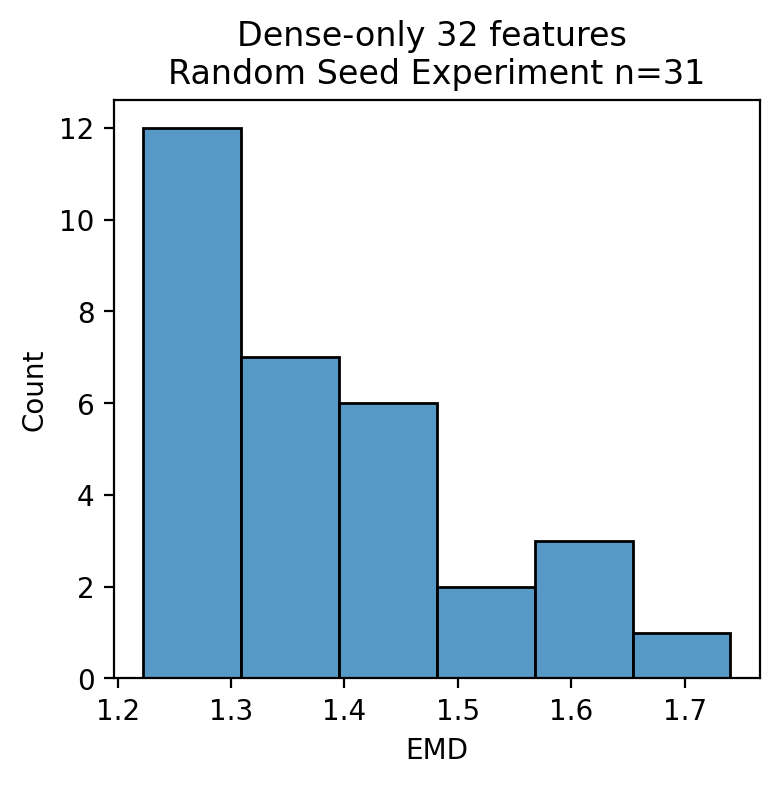

In [80]:
"""
EMD Histogram
"""
experiment_dir = "./mlp_random_seed_exp/"
emd_hist(
    experiment_dir, 
    title="Dense-only 32 features \nRandom Seed Experiment", 
    filename="mlp_random_seed_emds_hist"
)

With 128 dense features, lr = 0.001, batch size = 512, and no last relu activation

In [85]:
experiment_dir = "./mlp128_random_seed_exp/"

emd_files = get_emd_files(experiment_dir)
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, seed\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {seed}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

      emd        seed
0   0.999  1822556975
1   0.999   434214399
2   1.003  2064719489
3   1.037   317331638
4   1.038   126687014
5   1.038  1589076274
6   1.044  1523643930
7   1.086  1785518820
8   1.121  1994079540
9   1.143   436657949
10  1.221  1193976549
11  1.229   353440445
12  1.263   499893397
13  1.269  2078797010
14  1.283   536787941
15  1.287  1860481001
16  1.296   854141105
17  1.366  2008102734
18  1.375     6849925
19  1.474   679775819
20  1.547  1747954292
21  1.673  1207866501


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


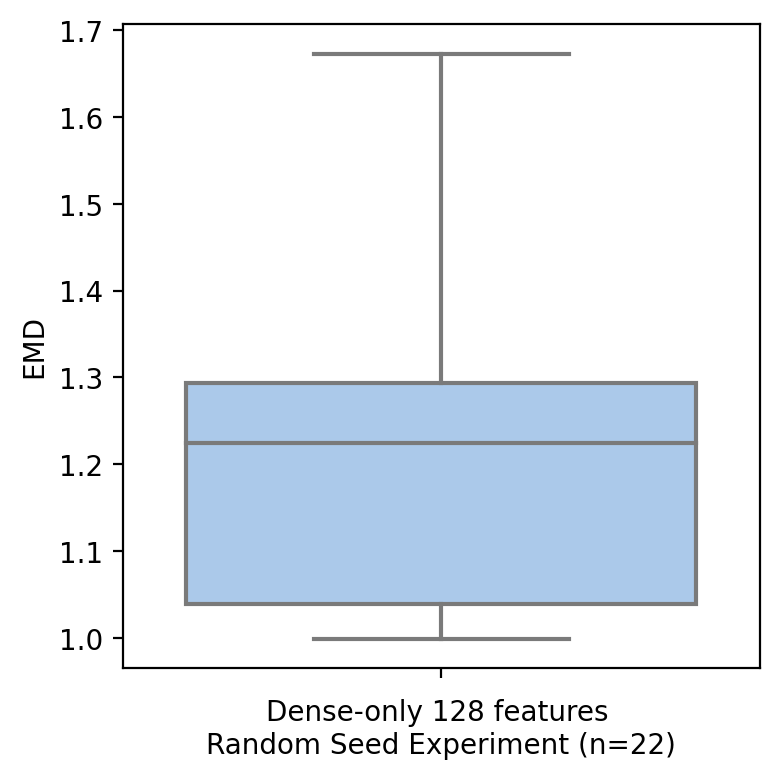

In [86]:
"""
EMD Box Plot
"""
experiment_dir = "./mlp128_random_seed_exp/"
emd_box_plot(
    experiment_dir, 
    title="Dense-only 128 features \nRandom Seed Experiment", 
    filename="mlp128_random_seed_emds"
)

/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_2359040/2664757524.py:65: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=emds, palette="pastel")
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


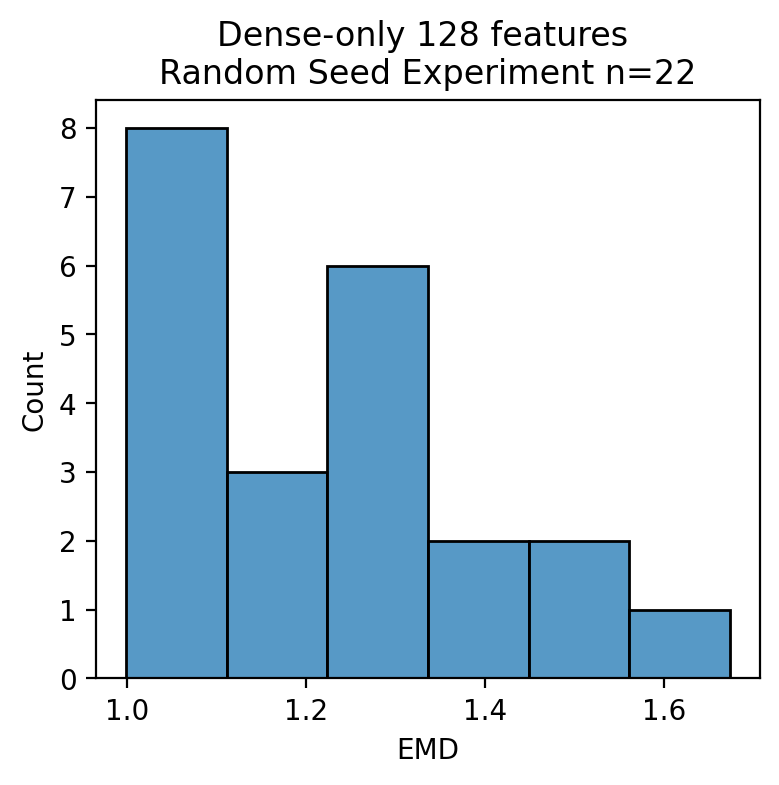

In [87]:
"""
EMD Histogram
"""
experiment_dir = "./mlp128_random_seed_exp/"
emd_hist(
    experiment_dir, 
    title="Dense-only 128 features \nRandom Seed Experiment", 
    filename="mlp128_random_seed_emds_hist"
)

With 128 features, BN, WD = 0.01, LR = 0.001, batch size = 512, LR schedule = 50

In [91]:
experiment_dir = "./mlp128_bn_wd_cos_restarts_random_seed_exp/"

emd_files = get_emd_files(experiment_dir)
results_file = os.path.join(experiment_dir, "results.csv")
with open(results_file, "w") as f:
    f.write("emd, seed\n")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    with open(results_file, "a") as f:
        f.write(f"{emd:.3f}, {seed}\n")
df = pd.read_csv(results_file)
print(df.sort_values('emd', ignore_index=True))

      emd        seed
0   0.872  1523643930
1   0.888  1589076274
2   0.893  1994079540
3   0.895  1785518820
4   0.906  2078797010
5   0.907   436657949
6   0.908   434214399
7   0.919  1822556975
8   0.926     6849925
9   0.929   854141105
10  0.936   126687014
11  0.940  1193976549
12  0.951  2008102734
13  0.964  1207866501
14  0.970   499893397
15  0.971   317331638
16  0.995  2064719489
17  1.002   353440445
18  1.002  1860481001
19  1.011   679775819
20  1.062  1747954292
21  1.067   536787941


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


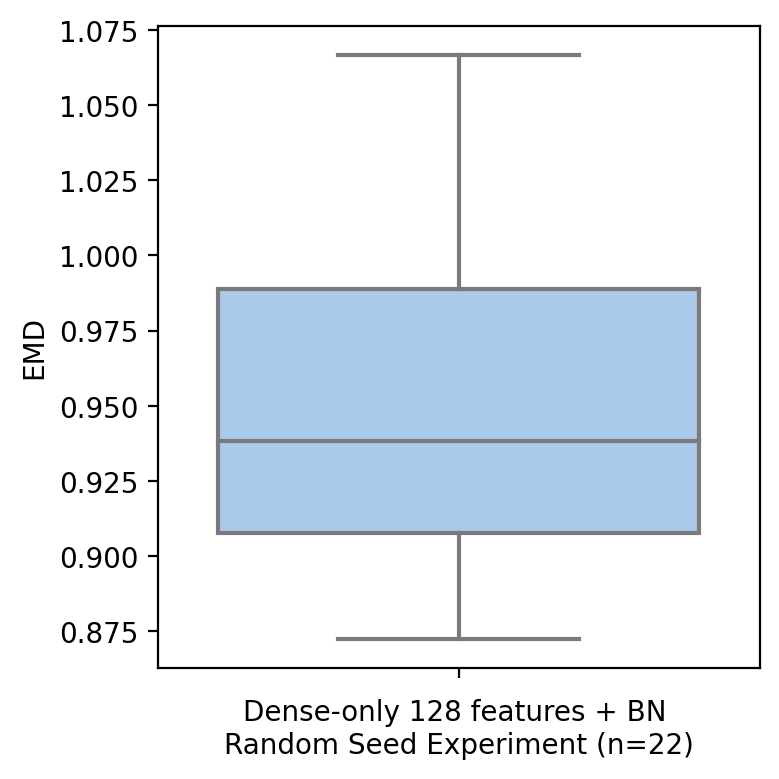

In [97]:
"""
EMD Box Plot
"""
experiment_dir = "./mlp128_bn_wd_cos_restarts_random_seed_exp/"
emd_box_plot(
    experiment_dir, 
    title="Dense-only 128 features + BN \nRandom Seed Experiment", 
    filename="mlp128bn_random_seed_emds"
)

/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_2359040/233960496.py:66: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=emds, palette="pastel")
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


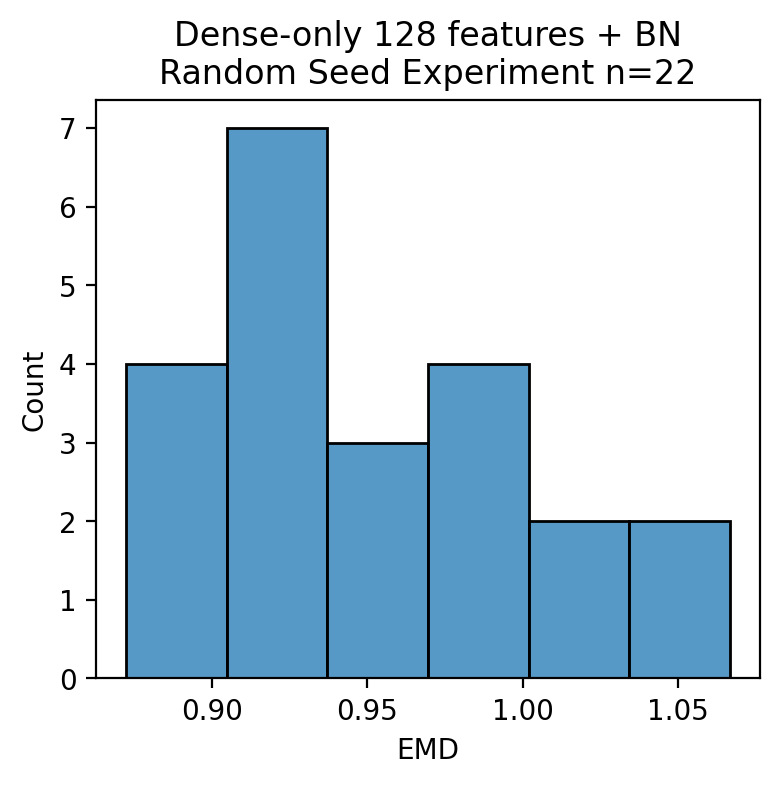

In [98]:
"""
EMD Histogram
"""
experiment_dir = "./mlp128_bn_wd_cos_restarts_random_seed_exp/"
emd_hist(
    experiment_dir, 
    title="Dense-only 128 features + BN\nRandom Seed Experiment", 
    filename="mlp128bn_random_seed_emds_hist"
)

# Dense-only Quantized Input Linear Search

[(4, 1.1912774175607175), (5, 1.0563364533885513), (6, 0.965211744858275), (7, 0.9005226873831613), (8, 0.8809361880730295)]


/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/proj/xlabs/users/olivweng/opt/mambaforge/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py

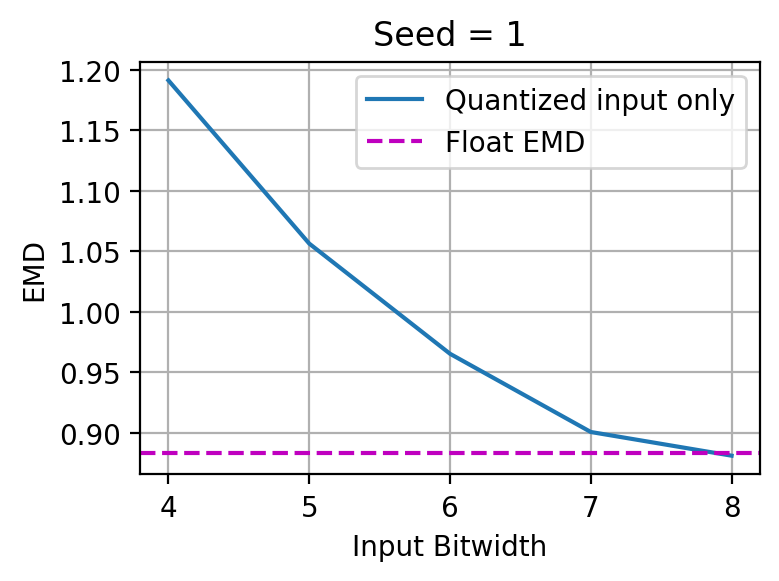

In [11]:
experiment_dir = "./dense_qinput_float_model/"
emd_files = get_emd_files(experiment_dir)
relu_ticks = set()
id_ticks = set()
seed = 0
bitwidth_and_emds = []
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    input_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    bitwidth_and_emds.append((input_bitwidth, emd))
# Sort by bitwidth
bitwidth_and_emds.sort(key=lambda x : x[0]) 
print(bitwidth_and_emds)
bitwidths = [b for b, _ in bitwidth_and_emds]
emds = [e for _, e in bitwidth_and_emds]

fig, ax = plt.subplots(figsize=(4, 3))
sns.lineplot(x=bitwidths, y=emds, ax=ax, linewidth=1.5, label="Quantized input only")
ax.axhline(y=DENSE128_FLOAT_EMD_SEED1, ls="--", color="m", label="Float EMD")

plt.title(f"Seed = {seed}")

plt.xlabel("Input Bitwidth")
plt.ylabel("EMD")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("./plots/dense128_qinput_lineplot.pdf")

## Dense-only Quantized Activation Grid Search
With 6-bit inputs

QID X QR
[[1.30863172 1.27084319 1.27552888 1.26778813]
 [1.02552179 0.98884245 0.97356128 0.97443525]
 [0.99394896 0.92954326 0.92628262 0.92526161]
 [0.99398656 0.92464205 0.9186682  0.9191678 ]]
Min EMD: 0.9186681969229323
Max EMD: 1.3086317171076798


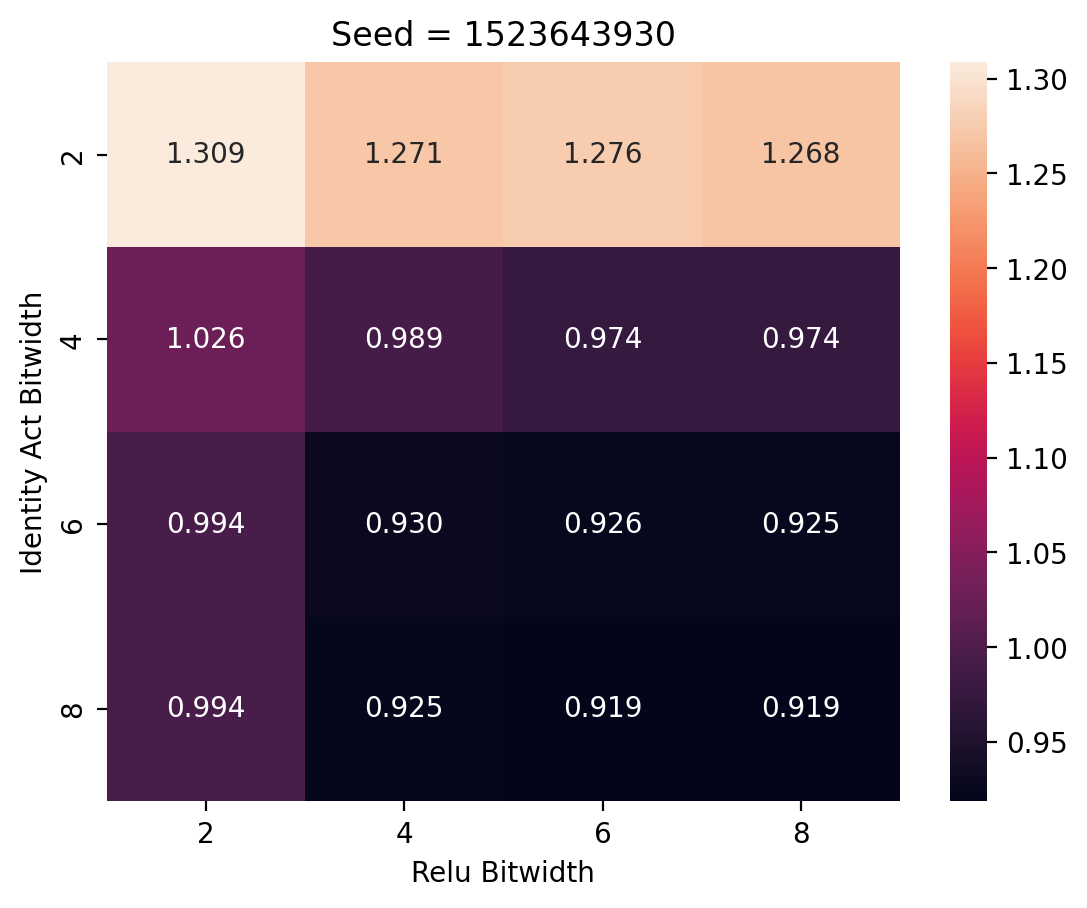

In [14]:
"""
Heatmap for quant activation grid search

EMD grid
     Quant ReLU
     2 4 6 8
2    x
4      y
6        z
8          a 
QID
"""
experiment_dir = "./dense_qact_grid_search/"
emd_files = get_emd_files(experiment_dir)
emd_grid = np.zeros((4, 4))
relu_ticks = set()
id_ticks = set()
seed = 0
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    qrelu_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    qidentity_bitwidth = int(re.findall(f'\d+', txt_file)[2])
    relu_ticks.add(qrelu_bitwidth)
    id_ticks.add(qidentity_bitwidth)
    # Map bitwidth to grid coordinates
    qrelu_y_idx = (qrelu_bitwidth - 2) // 2
    qid_x_idx = (qidentity_bitwidth - 2) // 2
    emd_grid[qid_x_idx][qrelu_y_idx] = emd
    # print(f"({qidentity_bitwidth}, {qrelu_bitwidth}) -> ({qid_x_idx}, {qrelu_y_idx}) = {emd:.3f}")
print("QID X QR")
print(emd_grid)
min_emd = np.min(emd_grid)
max_emd = np.max(emd_grid)
print(f"Min EMD: {min_emd}")
print(f"Max EMD: {max_emd}")

sns.heatmap(emd_grid, vmin=min_emd, vmax=max_emd, annot=True, fmt=".3f")

relu_ticks = sorted(list(relu_ticks))
id_ticks = sorted(list(id_ticks))

plt.xticks(np.arange(len(relu_ticks)) + 0.5, relu_ticks)
plt.yticks(np.arange(len(id_ticks)) + 0.5, id_ticks)
plt.title(f"Seed = {seed}")

plt.xlabel("Relu Bitwidth")
plt.ylabel("Identity Act Bitwidth")

plt.savefig("./plots/dense_qact_gridsearch_heatmap.pdf")

Lower bitwidths trained for 500 epochs

QID X QR
[[1.29981047 1.27730351 1.2687654 ]
 [1.09105528 1.05703902 1.04940599]
 [1.01383816 0.9824156  0.97365841]]
Min EMD: 0.9736584115153176
Max EMD: 1.2998104694060586


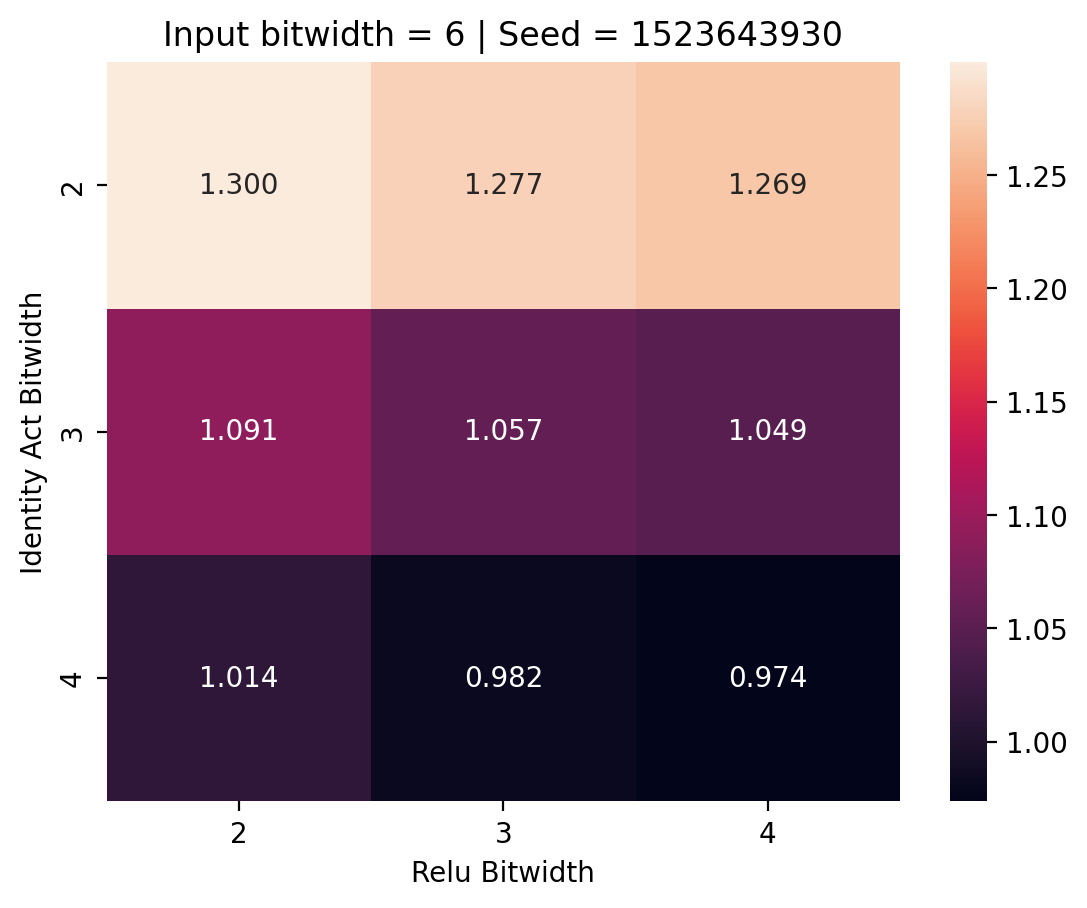

In [7]:
"""
Heatmap for quant activation grid search

EMD grid
     Quant ReLU
     2 3 4 
2    x
3      y
4        z
QID
"""
experiment_dir = "./dense_qact_grid_search_500epochs/"
QINPUT_BITWIDTH = 6

emd_files = get_emd_files(experiment_dir)
emd_grid = np.zeros((3, 3))
relu_ticks = set()
id_ticks = set()
seed = 0
# print("QI, QR, EMD")
for file in emd_files:
    # Get EMD
    with open(file, "r") as f:
        emd = float(f.read())
    # Get quantization scheme
    txt_file = file.split("/")[-1]
    seed = int(re.findall(f'\d+', txt_file)[0])
    qrelu_bitwidth = int(re.findall(f'\d+', txt_file)[1])
    qidentity_bitwidth = int(re.findall(f'\d+', txt_file)[2])
    relu_ticks.add(qrelu_bitwidth)
    id_ticks.add(qidentity_bitwidth)
    # Map bitwidth to grid coordinates
    qrelu_y_idx = qrelu_bitwidth - 2
    qid_x_idx = qidentity_bitwidth - 2
    emd_grid[qid_x_idx][qrelu_y_idx] = emd
    # print(f"({qidentity_bitwidth}, {qrelu_bitwidth}) -> ({qid_x_idx}, {qrelu_y_idx}) = {emd:.3f}")
print("QID X QR")
print(emd_grid)
min_emd = np.min(emd_grid)
max_emd = np.max(emd_grid)
print(f"Min EMD: {min_emd}")
print(f"Max EMD: {max_emd}")

sns.heatmap(emd_grid, vmin=min_emd, vmax=max_emd, annot=True, fmt=".3f")

relu_ticks = sorted(list(relu_ticks))
id_ticks = sorted(list(id_ticks))

plt.xticks(np.arange(len(relu_ticks)) + 0.5, relu_ticks)
plt.yticks(np.arange(len(id_ticks)) + 0.5, id_ticks)
plt.title(f"Input bitwidth = {QINPUT_BITWIDTH} | Seed = {seed}")

plt.xlabel("Relu Bitwidth")
plt.ylabel("Identity Act Bitwidth")

plt.savefig("./plots/dense_qact_gridsearch_500epochs_heatmap.png")

# PyHessian

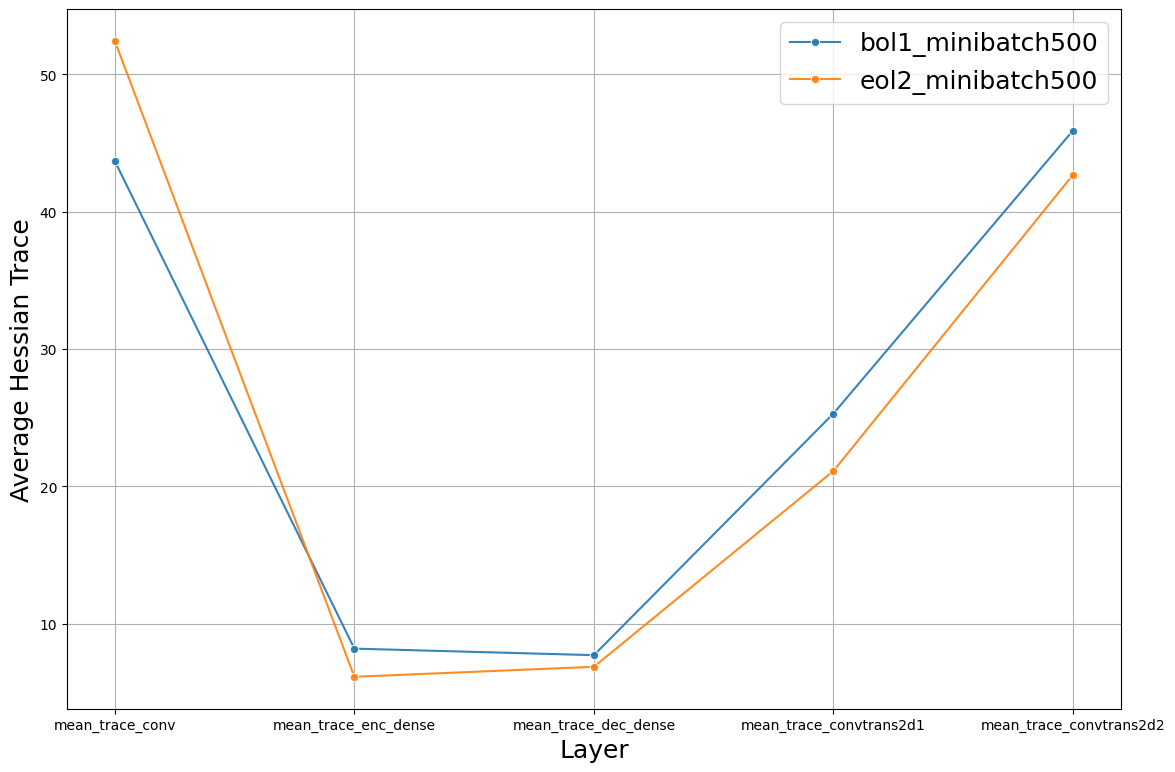

In [29]:
"""
Autoencoder PyHessian single batch
"""

df = pd.read_csv("./logs/autoencoder_mean_hessian_trace.csv")
fig, axs = plt.subplots(1, figsize=(12, 8))
fig.tight_layout()

for i in range(len(df.index)):
    if i == 1 or i == 5:
        mean_traces = []
        for layer in df.columns[1:]:
            mean_traces.append(df.iloc[i][layer])
        sns.lineplot(mean_traces, marker='o', label=df.iloc[i]["model"], alpha=0.9)

plt.xlabel("Layer", fontsize=18)
plt.ylabel("Average Hessian Trace", fontsize=18)
plt.xticks(list(range(len(df.columns[1:]))), df.columns[1:])
plt.grid()
plt.legend(fontsize=18)
# plt.yscale("log")
# plt.subplots_adjust(wspace=5, hspace=5)
plt.subplots_adjust(left=0.1, bottom=0.1)
plt.savefig("plots/worst-bol-vs-eol-autoencoder-pyhessian.png")